In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#import library 

In [ ]:
import pandas as pd
import numpy as np
import os
import operator
import math as m
import matplotlib.pyplot as plt


#read data from file 

In [ ]:
data =pd.read_csv("/content/drive/MyDrive/IR /IR-assignment-2-data.csv",sep=" ",header = None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239088,0,qid:29989,1:2,2:0,3:1,4:1,5:2,6:1,7:0,8:0.50000,...,128:9754,129:29,130:2889,131:63571,132:1,133:1,134:0,135:0,136:0,NaN
239089,0,qid:29989,1:2,2:0,3:1,4:0,5:2,6:1,7:0,8:0.50000,...,128:84,129:1,130:9450,131:19599,132:4,133:4,134:0,135:0,136:0,NaN
239090,1,qid:29989,1:2,2:0,3:2,4:2,5:2,6:1,7:0,8:1,...,128:1,129:0,130:144,131:6701,132:5,133:2,134:0,135:0,136:0,NaN
239091,1,qid:29989,1:2,2:0,3:2,4:0,5:2,6:1,7:0,8:1,...,128:0,129:11,130:2152,131:65535,132:37,133:16,134:0,135:0,136:0,NaN


In [ ]:
data[76]

0           75:90.53171
1         75:538.388954
2          75:88.171761
3         75:144.564444
4         75:142.589323
              ...      
239088    75:123.200543
239089     75:24.981669
239090     75:94.323435
239091     75:67.916264
239092    75:127.427666
Name: 76, Length: 239093, dtype: object

# here we create new data that contain only quid4

In [ ]:
newdata=data[data[1]=="qid:4"]

In [ ]:
newdata.shape

(103, 139)

In [ ]:
newdata[76]

0        75:90.53171
1      75:538.388954
2       75:88.171761
3      75:144.564444
4      75:142.589323
           ...      
98      75:70.460443
99      75:270.13233
100    75:296.023694
101    75:528.520116
102     75:84.625987
Name: 76, Length: 103, dtype: object

In [ ]:
relevance =[]
sortedrelevance=[]
relevance=list(newdata[0])
sortedrelevance=list(newdata[0])
sortedrelevance.sort(reverse=True)

In [ ]:
newdata[0][32]

1

In [ ]:
newdata[75][10]

'74:0'

In [ ]:
newdata1=newdata.copy()

# This is the file that give maximum DCG

In [ ]:
newdata1 =newdata1.sort_values(by=[0],ascending=False)
newdata1

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,NaN
18,2,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:0,129:5,130:790,131:4744,132:18,133:60,134:0,135:0,136:0,NaN
76,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9,NaN
61,2,qid:4,1:2,2:1,3:1,4:0,5:2,6:0.666667,7:0.333333,8:0.333333,...,128:3181,129:16,130:39773,131:26970,132:4,133:8,134:0,135:0,136:0,NaN
52,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:1067,129:1,130:6930,131:8855,132:4,133:95,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,128:88,129:3,130:6555,131:15788,132:40,133:133,134:0,135:0,136:0,NaN
30,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:4976,129:1,130:27439,131:21610,132:4,133:7,134:0,135:0,136:0,NaN
28,0,qid:4,1:3,2:0,3:1,4:0,5:3,6:1,7:0,8:0.333333,...,128:993,129:10,130:7060,131:5916,132:9,133:15,134:0,135:0,136:0,NaN
27,0,qid:4,1:3,2:1,3:3,4:0,5:3,6:1,7:0.333333,8:1,...,128:84,129:5,130:541,131:395,132:146,133:180,134:0,135:0,136:0,NaN


#Save this file which generate Max DCG

In [ ]:
newdata1.to_csv("Max_DCG_File.csv",index=False)

In [ ]:
listofdata=[]
index=0
for i in newdata[76]:
  str=i.split(":")
  if(newdata[0][index]!=0):
    listofdata.append([1,float(str[1])])
  else:
    listofdata.append([0,float(str[1])])
  index+=1
  
   

   





type(relevance)

In [ ]:
relevance

In [ ]:
list1=set(relevance)



#Unique Value in Relevance column

In [ ]:
list1

{0, 1, 2, 3}

#Code to calculate occurance of each level

In [ ]:
l1=0
l2=0
l3=0
l4=0
for i in range(len(relevance)):
  if(relevance[i]==3):
    l1+=1
  elif(relevance[i]==2):
    l2+=1;
  elif(relevance[i]==1):
    l3+=1;  
  elif(relevance[i]==0):
    l4+=1;

In [ ]:
print(l1,l2,l3,l4)

1 17 26 59


# here we are counting for file that give max DCG

In [ ]:
count=m.factorial(l1)*m.factorial(l2)*m.factorial(l3)*m.factorial(l4)

# total no of rearring of file that give max DCG

In [ ]:
count

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000

#list2 contain top 50 docement from dataset whose qid 4

In [ ]:
list2=[]
for i in range(0,50):
  list2.append(relevance[i])

In [ ]:
list3=[]
list3=list2
list3

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 3,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
list2

#Fun to compute DCG

In [ ]:
def DCG_fun(input):
  dcg=input[0]
  for i in range(1,len(input)):
    dcg+=input[i]/m.log2(i+1)
  return dcg  
    

#nDGC for top 50

In [ ]:
dcg_50=DCG_fun(list2)
list3.sort(reverse=True)
idcg_50=DCG_fun(list2)
n_dcg_50=dcg_50/idcg_50
print(dcg_50)
print(idcg_50)
print(n_dcg_50)

7.390580969258021
14.067092644997018
0.5253808413557646


# nDCG for whole data set

In [ ]:
dcgscore=DCG_fun(relevance)
idcs=DCG_fun(sortedrelevance)
ndgc=dcgscore/idcs
print(dcgscore)
print(idcs)
print(ndgc)

12.550247459532576
20.989750804831445
0.5979226516897831


In [ ]:
list2

[3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

#Relevance score 

In [ ]:
# dict1 contain line no ,relavance in key value form
dict1={}
index=0
for i in range(len(relevance)):
  dict1[index]=relevance[i]
  index+=1



#Sorted list in decring order

In [ ]:
#relevance.sort(reverse=True)

In [ ]:
print(relevance)

[0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0]


In [ ]:
dict1

In [ ]:
# Sorted relevance in de-creasing order
# dict2 contain sorted relevance 
dict2= sorted(dict1.items(), key=operator.itemgetter(1),reverse=True)
#sorted_dict = dict(sorted(dict1.items(),key=operator.itemgetter(1),reverse=True))

In [ ]:
dict2=dict(dict2)
print(dict2)

{7: 3, 18: 2, 19: 2, 21: 2, 22: 2, 25: 2, 34: 2, 36: 2, 37: 2, 40: 2, 52: 2, 58: 2, 61: 2, 62: 2, 68: 2, 76: 2, 90: 2, 100: 2, 4: 1, 6: 1, 10: 1, 13: 1, 17: 1, 20: 1, 24: 1, 29: 1, 32: 1, 38: 1, 53: 1, 55: 1, 60: 1, 66: 1, 72: 1, 74: 1, 75: 1, 82: 1, 83: 1, 84: 1, 85: 1, 88: 1, 92: 1, 96: 1, 99: 1, 101: 1, 0: 0, 1: 0, 2: 0, 3: 0, 5: 0, 8: 0, 9: 0, 11: 0, 12: 0, 14: 0, 15: 0, 16: 0, 23: 0, 26: 0, 27: 0, 28: 0, 30: 0, 31: 0, 33: 0, 35: 0, 39: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 54: 0, 56: 0, 57: 0, 59: 0, 63: 0, 64: 0, 65: 0, 67: 0, 69: 0, 70: 0, 71: 0, 73: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 86: 0, 87: 0, 89: 0, 91: 0, 93: 0, 94: 0, 95: 0, 97: 0, 98: 0, 102: 0}


In [ ]:
type(dict2)

dict


#Discounted Cumulative Gain (DCG) at rank n
#DCG = r1 + r2/log22 + r3/log23 + ... rn/log2n
# formula for NDGC
#nDcg=(DCG/iDCG)

In [ ]:
list1=dict1.values()

In [ ]:
list1

dict_values([0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0])

# 4th part of question 

In [ ]:
total_relevant=0
for i in listofdata:
  if i[0]==1:
    total_relevant+=1

In [ ]:
total_relevant

44

In [ ]:
listofdata

[[1, 38.118056],
 [0, 28.531344],
 [1, 25.000682],
 [1, 22.704086],
 [0, 22.704086],
 [0, 22.704086],
 [1, 22.704086],
 [0, 18.944632],
 [1, 15.41397],
 [1, 15.41397],
 [0, 15.41397],
 [0, 15.41397],
 [0, 15.41397],
 [1, 15.41397],
 [1, 15.41397],
 [1, 15.41397],
 [0, 13.117374],
 [1, 9.586712],
 [1, 9.586712],
 [0, 9.586712],
 [1, 9.586712],
 [1, 9.586712],
 [1, 9.586712],
 [0, 9.586712],
 [0, 9.586712],
 [0, 9.586712],
 [1, 9.586712],
 [1, 9.586712],
 [1, 9.586712],
 [0, 5.827258],
 [0, 5.827258],
 [0, 5.827258],
 [0, 5.827258],
 [0, 5.827258],
 [0, 5.827258],
 [0, 5.827258],
 [0, 0.0],
 [0, 0.0],
 [0, 0.0],
 [0, 0.0],
 [1, 0.0],
 [0, 0.0],
 [0, 0.0],
 [1, 0.0],
 [0, 0.0],
 [1, 0.0],
 [0, 0.0],
 [0, 0.0],
 [0, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [0, 0.0],
 [0, 0.0],
 [0, 0.0],
 [1, 0.0],
 [0, 0.0],
 [1, 0.0],
 [0, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [0, 0.0],
 [1, 0.0],
 [0, 0.0],
 [0, 0.0],
 [0, 0.0],
 [0, 0.0],
 [1, 0.0],
 [1, 0.0],
 [0, 0.0],
 [0, 0.0],
 [1, 0.0

In [ ]:
listofdata=sorted(listofdata,key=lambda x:x[1],reverse=True)
#print(listofdata)
total=len(listofdata)
precisionofdata = []
recallofdata = []
tpcount=0
currentcount=1
current=listofdata[0][0]
precisionofdata.append(current/currentcount)
recallofdata.append(current/total_relevant)
for i in range(1,len(listofdata)):
  current+=listofdata[i][0]
  currentcount+=1;
  precisionofdata.append(current/currentcount)
  recallofdata.append(current/total_relevant)
















In [ ]:
listofdata

[[0, 972.826451],
 [0, 612.893205],
 [0, 571.500533],
 [0, 538.388954],
 [1, 528.520116],
 [0, 463.099129],
 [1, 439.396463],
 [1, 411.010633],
 [0, 316.319283],
 [1, 311.705149],
 [0, 305.102064],
 [1, 296.023694],
 [1, 292.184568],
 [1, 270.13233],
 [1, 237.21632],
 [1, 237.21632],
 [0, 226.444023],
 [1, 217.848266],
 [0, 212.401296],
 [1, 202.442155],
 [0, 201.720933],
 [1, 200.840161],
 [0, 200.840161],
 [1, 198.480212],
 [1, 192.953467],
 [1, 188.936782],
 [0, 188.129935],
 [0, 187.934366],
 [0, 186.375414],
 [0, 185.617459],
 [0, 180.720002],
 [1, 180.24324],
 [0, 177.168378],
 [1, 176.875026],
 [0, 176.000104],
 [0, 169.844071],
 [1, 166.683125],
 [1, 161.455583],
 [0, 161.455583],
 [1, 161.15638],
 [1, 157.05992],
 [1, 156.301965],
 [0, 148.415271],
 [0, 148.415271],
 [0, 144.564444],
 [0, 143.769297],
 [1, 143.445062],
 [0, 142.9683],
 [1, 142.589323],
 [0, 142.589323],
 [1, 142.038637],
 [1, 140.479685],
 [0, 130.655061],
 [1, 121.96152],
 [1, 121.814843],
 [0, 121.007996],
 

In [ ]:
print(precisionofdata)

[0.0, 0.0, 0.0, 0.0, 0.2, 0.16666666666666666, 0.2857142857142857, 0.375, 0.3333333333333333, 0.4, 0.36363636363636365, 0.4166666666666667, 0.46153846153846156, 0.5, 0.5333333333333333, 0.5625, 0.5294117647058824, 0.5555555555555556, 0.5263157894736842, 0.55, 0.5238095238095238, 0.5454545454545454, 0.5217391304347826, 0.5416666666666666, 0.56, 0.5769230769230769, 0.5555555555555556, 0.5357142857142857, 0.5172413793103449, 0.5, 0.4838709677419355, 0.5, 0.48484848484848486, 0.5, 0.4857142857142857, 0.4722222222222222, 0.4864864864864865, 0.5, 0.48717948717948717, 0.5, 0.5121951219512195, 0.5238095238095238, 0.5116279069767442, 0.5, 0.4888888888888889, 0.4782608695652174, 0.48936170212765956, 0.4791666666666667, 0.4897959183673469, 0.48, 0.49019607843137253, 0.5, 0.49056603773584906, 0.5, 0.509090909090909, 0.5, 0.5087719298245614, 0.5172413793103449, 0.5084745762711864, 0.5166666666666667, 0.5081967213114754, 0.5, 0.5079365079365079, 0.5, 0.49230769230769234, 0.48484848484848486, 0.49253

In [ ]:
print(recallofdata)

[0.0, 0.0, 0.0, 0.0, 0.022727272727272728, 0.022727272727272728, 0.045454545454545456, 0.06818181818181818, 0.06818181818181818, 0.09090909090909091, 0.09090909090909091, 0.11363636363636363, 0.13636363636363635, 0.1590909090909091, 0.18181818181818182, 0.20454545454545456, 0.20454545454545456, 0.22727272727272727, 0.22727272727272727, 0.25, 0.25, 0.2727272727272727, 0.2727272727272727, 0.29545454545454547, 0.3181818181818182, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.36363636363636365, 0.36363636363636365, 0.38636363636363635, 0.38636363636363635, 0.38636363636363635, 0.4090909090909091, 0.4318181818181818, 0.4318181818181818, 0.45454545454545453, 0.4772727272727273, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5227272727272727, 0.5227272727272727, 0.5454545454545454, 0.5454545454545454, 0.5681818181818182, 0.5909090909090909, 0.5909090909090909, 0.6136363636363636, 0.6363636363636364, 0.6363636363636364, 0.6590909090909091

#Precision-Recall curve for query “qid:4”.

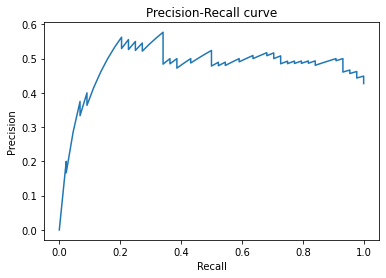

In [ ]:
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.plot(recallofdata,precisionofdata)
plt.show()